In [55]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb

In [56]:
def plot(m):
    xx = np.linspace(0, x_1[len(x_1)-1], x_1[len(x_1)-1]*100)[:,None]
    mean, var = m.predict(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(x_1, p2_1, 'ko', mew=1)
    plt.plot(xx, mean, 'b', lw=1)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(0, x_1[len(x_1)-1])

In [57]:
mat_file = io.loadmat('2014_Dataset1.mat')
t = mat_file['t']
p1 = mat_file['p1']
p2 = mat_file['p2']
t = t*24

In [58]:
kernel = GPy.kern.RBF(input_dim=1)
t_1 = t[0:288]
x_1 = np.arange(0,288,1)
x_1 = np.reshape(x_1,[len(x_1),1])
p2_1 = p2[0:288]
p1_1 = p1[0:288]
y_1 = p2_1
y_2 = p1_1

In [59]:
m = GPy.models.GPRegression(x_1, p2_1, kernel)
m.optimize()

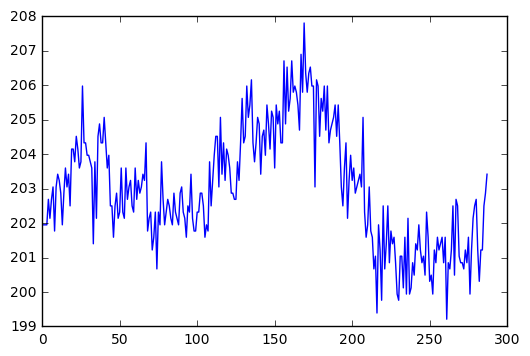

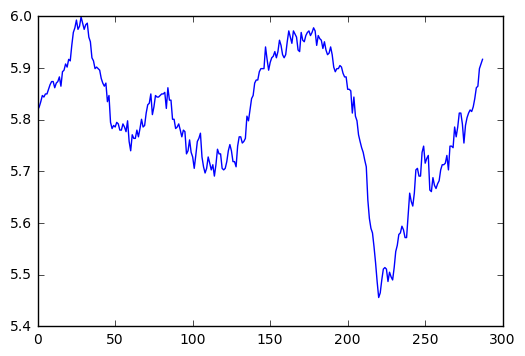

In [60]:
plt.plot(x_1, p2_1)
plt.show()
p1_1 = p1[0:288]
plt.plot(x_1, p1_1)
plt.show()

 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


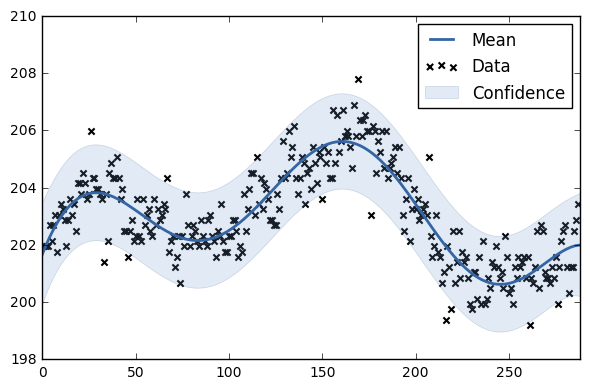

In [61]:
fig = m.plot()
plt.axis([0,288,198,210])
plt.show()

In [100]:
def plot_2outputs(m,xlim,ylim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2)


In [63]:
K=GPy.kern.RBF(1)
B = GPy.kern.Coregionalize(input_dim=1,output_dim=2)
multkernel = K.prod(B,name='B.K')
print(multkernel)

  B_K.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  coregion.W       |  (2, 1)  |               |        
  coregion.kappa   |    (2,)  |      +ve      |        


In [64]:
icm = GPy.util.multioutput.ICM(input_dim=1,num_outputs=2,kernel=GPy.kern.RBF(1))
print(icm)

  ICM.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  B.W              |  (2, 1)  |               |        
  B.kappa          |    (2,)  |      +ve      |        


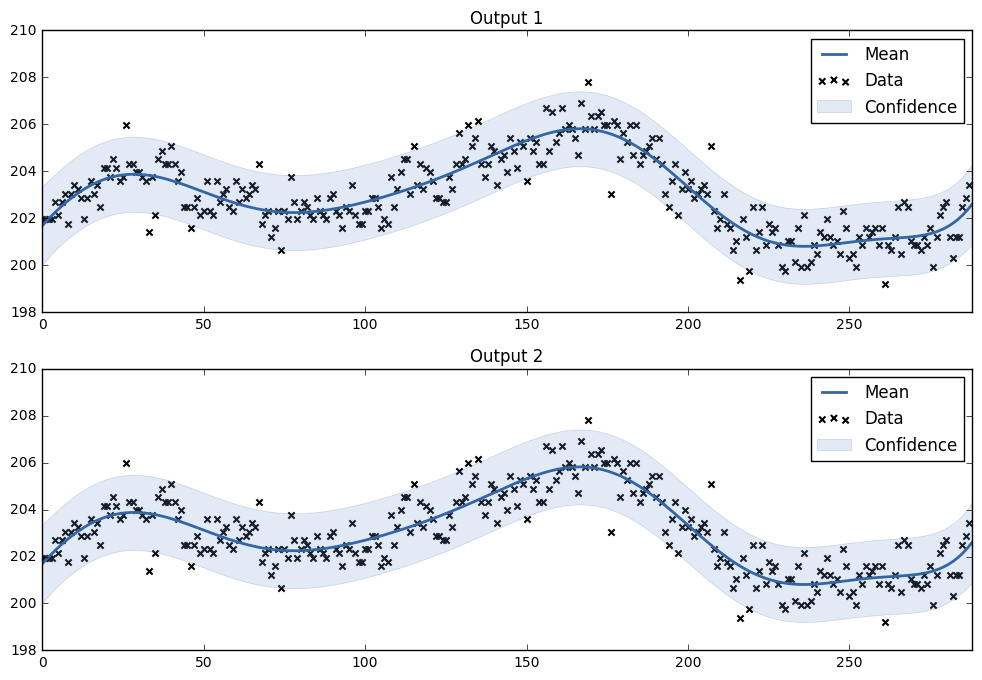

In [65]:
multi = GPy.models.GPCoregionalizedRegression(X_list=[x_1,x_1],Y_list=[y_1,y_1],kernel=icm)
multi.optimize()
plot_2outputs(multi, xlim=(0,len(x_1)),ylim=(y_1[0]*0.8,y_1[0]*1.2))
plt.show()

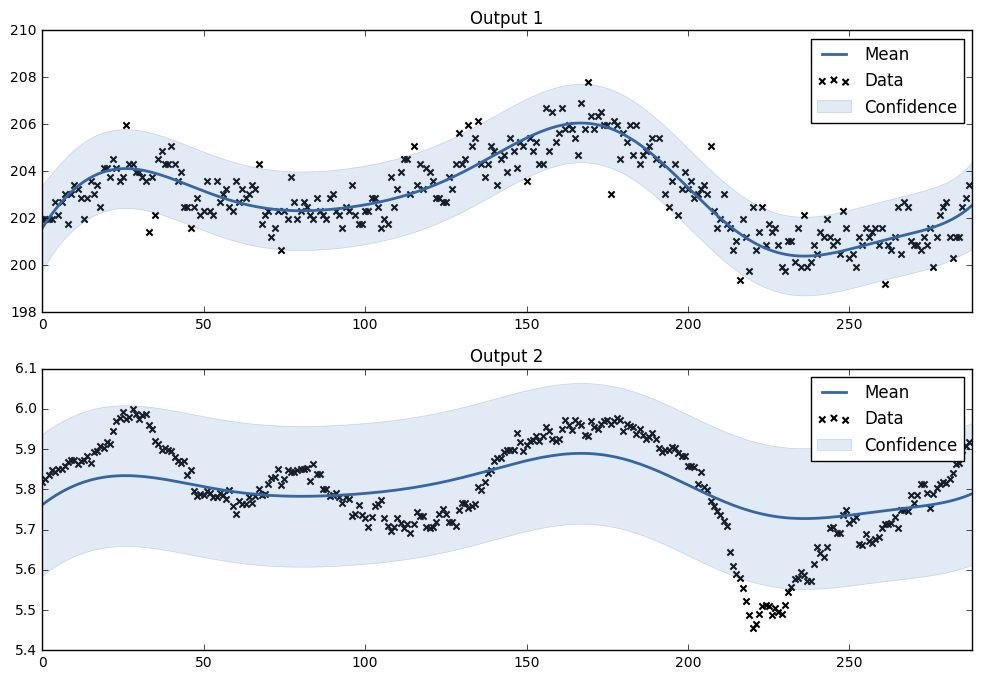


Name : gp
Objective : 122.12582501413863
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  gp.                                    |            value  |  constraints  |  priors
  ICM.rbf.variance                       |    14.8246385443  |      +ve      |        
  ICM.rbf.lengthscale                    |    69.2470773668  |      +ve      |        
  ICM.B.W                                |           (2, 1)  |               |        
  ICM.B.kappa                            |             (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |   0.708854358329  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  0.0079401967813  |      +ve      |        


In [66]:
multi = GPy.models.GPCoregionalizedRegression(X_list=[x_1,x_1],Y_list=[y_1,y_2],kernel=icm)
multi.optimize()
plot_2outputs(multi, xlim=(0,len(x_1)),ylim=(y_1[0]*0.8,y_1[0]*1.2))
plt.show()
print(multi)

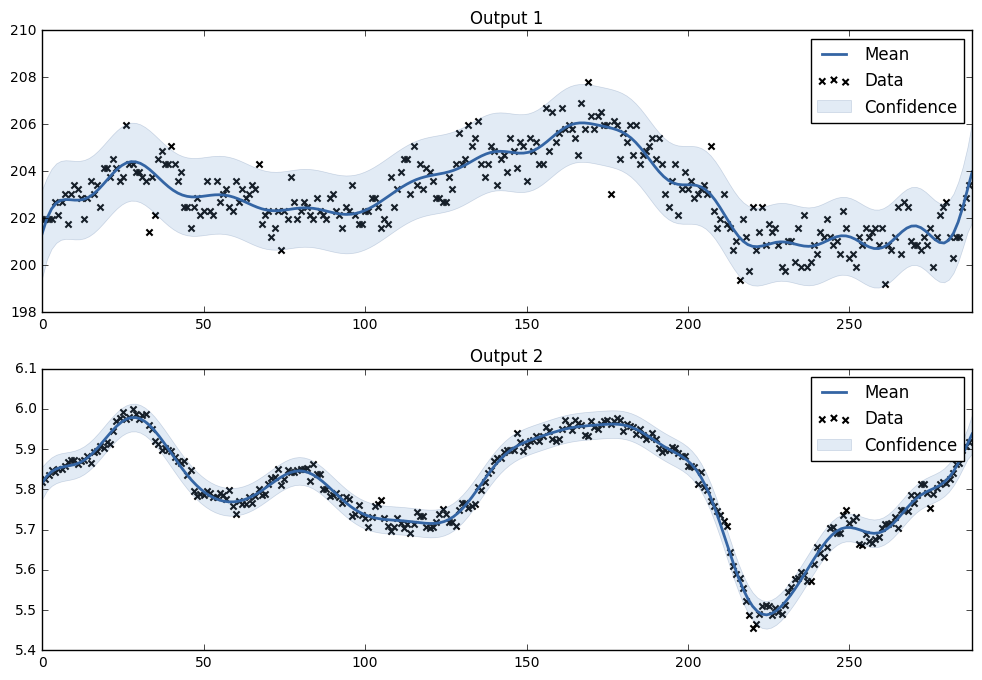


Name : gp
Objective : -222.24141638194112
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |              value  |  constraints  |  priors
  ICM.rbf.variance                       |                2.0  |   fixed +ve   |        
  ICM.rbf.lengthscale                    |      18.0463133999  |      +ve      |        
  ICM.B.W                                |             (2, 1)  |               |        
  ICM.B.kappa                            |               (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |     0.664533623315  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  0.000282321067468  |      +ve      |        


In [77]:
mul = GPy.models.GPCoregionalizedRegression(X_list=[x_1,x_1],Y_list=[y_1,y_2],kernel=icm)
mul['.*rbf.var'].constrain_fixed(2.)
mul.optimize()
plot_2outputs(mul, xlim=(0,len(x_1)),ylim=(y_1[0]*0.8,y_1[0]*1.2))
plt.show()
print(mul)

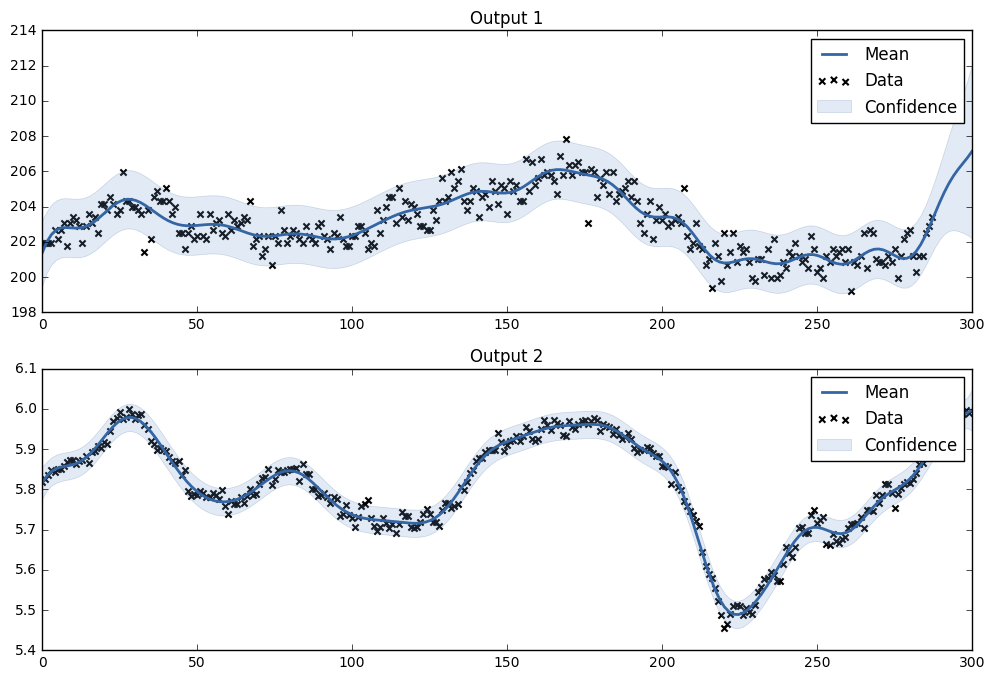


Name : gp
Objective : -250.4198904244182
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |              value  |  constraints  |  priors
  ICM.rbf.variance                       |                2.0  |   fixed +ve   |        
  ICM.rbf.lengthscale                    |      17.5763017723  |      +ve      |        
  ICM.B.W                                |             (2, 1)  |               |        
  ICM.B.kappa                            |               (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |     0.658364402642  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  0.000274134773059  |      +ve      |        


In [101]:
x_2 = np.arange(0,300,1)
x_2 = np.reshape(x_2,[len(x_2),1])
p2_1 = p2[0:288]
p1_1 = p1[0:300]
y_1 = p2_1
y_2 = p1_1
mul = GPy.models.GPCoregionalizedRegression(X_list=[x_1,x_2],Y_list=[y_1,y_2],kernel=icm)
mul['.*rbf.var'].constrain_fixed(2.)
mul.optimize()
plot_2outputs(mul, xlim=(0,len(x_2)),ylim=(y_1[0]*0.8,y_1[0]*1.2))
plt.show()
print(mul)

In [91]:
mul.likelihood

mixed_noise.,value,constraints,priors
Gaussian_noise_0.variance,0.664533623315,+ve,
Gaussian_noise_1.variance,0.000282321067468,+ve,


In [92]:
def build_XY(input_list,output_list=None):
    num_outputs = len(input_list)
    Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])

    return X,Y,I[:,None]

In [94]:
i_list = [x_1,x_1]
o_list = [y_1,y_2]
Xm, Ym, I = build_XY(i_list, o_list)

array([[  0,   0],
       [  1,   0],
       [  2,   0],
       ..., 
       [285,   1],
       [286,   1],
       [287,   1]])

In [97]:
from paramz import ObsAr
k = ObsAr(X)
k.shape

(576, 2)

In [103]:
import GPy.inference.latent_function_inference.exact_gaussian_inference as eg
poterior, likelihood, grad = eg.ExactGaussianInference.inference(m, m.kern, x_1, m.likelihood, y_1)
likelihood

-39391.099297104331